In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import seaborn as sns
from scipy.special import rel_entr
from scipy.stats import entropy

In [2]:
# List of available dataset
df18 = pd.read_csv("../exp2-inf/predictions_res18_2.csv")
df50 = pd.read_csv("../exp2-inf/predictions_res50_2.csv")
df101 = pd.read_csv("../exp2-inf/predictions_res101_2.csv")
label = pd.read_csv("../exp2-inf/labels.csv")
num_class = 257

In [3]:
prediction = pd.DataFrame({
    "pred18": df18.idxmax(axis=1),
    "pred50": df50.idxmax(axis=1),
    "pred101": df101.idxmax(axis=1),
    "target": label['target']
})
prediction["pred18"] = prediction["pred18"].str.extract('(\d+)').astype(int)
prediction["pred50"] = prediction["pred50"].str.extract('(\d+)').astype(int)
prediction["pred101"] = prediction["pred101"].str.extract('(\d+)').astype(int)

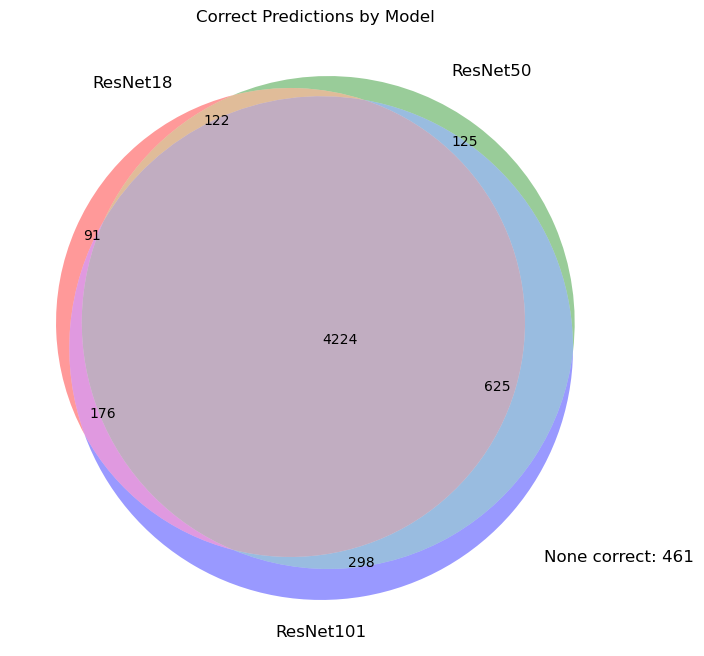

In [4]:
# Accuracy Venn Diagram:
df = prediction
correct_18 = set(df[df['pred18'] == df['target']].index)
correct_50 = set(df[df['pred50'] == df['target']].index)
correct_101 = set(df[df['pred101'] == df['target']].index)
total_indices = set(df.index)
incorrect_all = total_indices - (correct_18 | correct_50 | correct_101)
plt.figure(figsize=(8, 8))
venn_diagram = venn3([correct_18, correct_50, correct_101], ('ResNet18', 'ResNet50', 'ResNet101'))
plt.title('Correct Predictions by Model')
plt.text(0.5, -0.5, f'None correct: {len(incorrect_all)}', fontsize=12)
plt.show()

ou_res18=0.5967268844268535 | ou_res50=0.35323308562895256 | ou_res101=0.15073991393094044


Text(0, 0.5, 'Density')

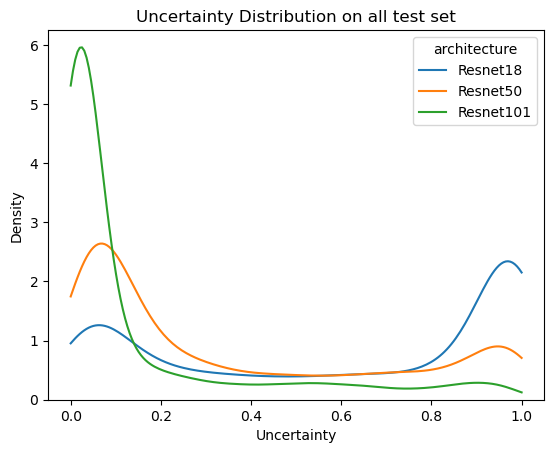

In [5]:
# Uncertainty Visualization
df18["uncertainty"]=1-df18.pow(2).sum(axis=1) # Brier Score
df50["uncertainty"]=1-df50.pow(2).sum(axis=1)
df101["uncertainty"]=1-df101.pow(2).sum(axis=1)
ou_res18 = df18["uncertainty"].mean()
ou_res50 = df50["uncertainty"].mean()
ou_res101 = df101["uncertainty"].mean()
print(f"{ou_res18=} | {ou_res50=} | {ou_res101=}")
sns.kdeplot(df18['uncertainty'], clip=[0, 1], label='Resnet18')
sns.kdeplot(df50['uncertainty'], clip=[0, 1], label='Resnet50')
sns.kdeplot(df101['uncertainty'], clip=[0, 1], label='Resnet101')
plt.legend(title='architecture')
plt.title('Uncertainty Distribution on all test set')
plt.xlabel('Uncertainty')
plt.ylabel('Density')

oc_res18=0.9039513037027024 | oc_res50=0.8942049228363482 | oc_res101=0.9388096569812723


Text(0, 0.5, 'Density')

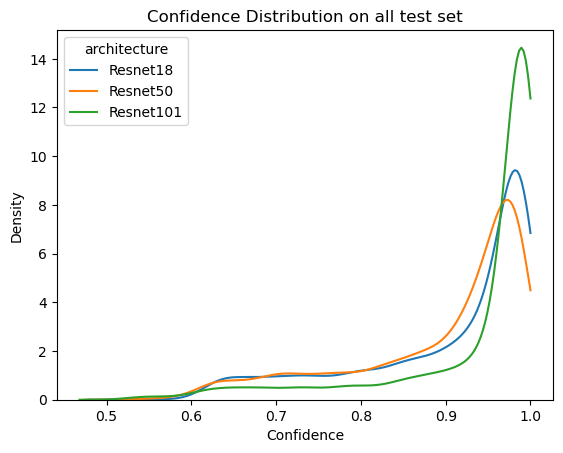

In [6]:
df18["confidence"]=df18.max(axis=1) # prediction confidence
df50["confidence"]=df50.max(axis=1)
df101["confidence"]=df101.max(axis=1)
oc_res18 = df18["confidence"].mean()
oc_res50 = df50["confidence"].mean()
oc_res101 = df101["confidence"].mean()
print(f"{oc_res18=} | {oc_res50=} | {oc_res101=}")
sns.kdeplot(df18['confidence'], clip=[0, 1], label='Resnet18')
sns.kdeplot(df50['confidence'], clip=[0, 1], label='Resnet50')
sns.kdeplot(df101['confidence'], clip=[0, 1], label='Resnet101')
plt.title('Confidence Distribution on all test set')
plt.legend(title='architecture')
plt.xlabel('Confidence')
plt.ylabel('Density')

In [7]:
df["acc18"] = np.where(df["pred18"]==df["target"],1,0)
df["acc50"] = np.where(df["pred50"]==df["target"],1,0)
df["acc101"] = np.where(df["pred101"]==df["target"],1,0)
oa_res18 = df["acc18"].mean()
oa_res50 = df["acc50"].mean()
oa_res101 = df["acc101"].mean()
print(f"{oa_res18=} | {oa_res50=} | {oa_res101=}")

oa_res18=0.7535119242077752 | oa_res50=0.8324077098987259 | oa_res101=0.8694870957203529


,pred18,pred50,pred101,target,acc18,acc50,acc101,kl_18_50,kl_18_101,kl_50_18,kl_50_101,kl_101_18,kl_101_50
0,24,24,24,24,1,1,1,-0.997149,1.444881,-0.782609,1.153053,1.315524,0.512795
1,77,77,77,77,1,1,1,-1.216780,0.346291,-1.329084,0.203183,-0.495532,-0.469369


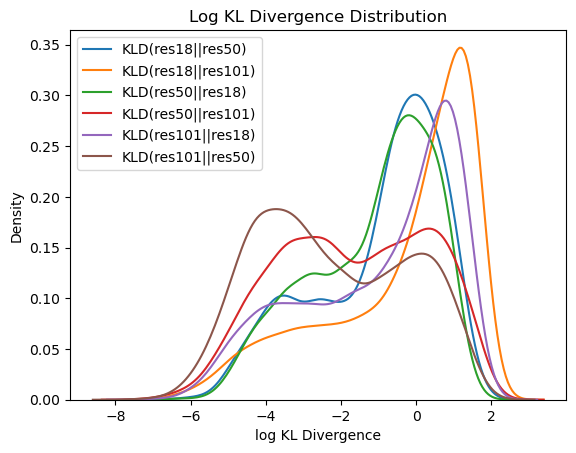

In [8]:
def calc_kl(Q,P,numclass):
    return np.log(rel_entr(Q.iloc[:,0:numclass],P.iloc[:,0:numclass]).sum(1))
df["kl_18_50"] = calc_kl(df18,df50,num_class)
df["kl_18_101"] = calc_kl(df18,df101,num_class)
df["kl_50_18"] = calc_kl(df50,df18,num_class)
df["kl_50_101"] = calc_kl(df50,df101,num_class)
df["kl_101_18"] = calc_kl(df101,df18,num_class)
df["kl_101_50"] = calc_kl(df101,df50,num_class)
display(df.head(2))
sns.kdeplot(df["kl_18_50"], label='KLD(res18||res50)')
sns.kdeplot(df["kl_18_101"], label='KLD(res18||res101)')
sns.kdeplot(df["kl_50_18"], label='KLD(res50||res18)')
sns.kdeplot(df["kl_50_101"], label='KLD(res50||res101)')
sns.kdeplot(df["kl_101_18"], label='KLD(res101||res18)')
sns.kdeplot(df["kl_101_50"], label='KLD(res101||res50)')
plt.title('Log KL Divergence Distribution')
plt.xlabel('log KL Divergence')
plt.ylabel('Density')
plt.legend()

/var/folders/ql/j7zs0n1150x82l4g24_b0jzm0000gn/T/ipykernel_40727/1238126589.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/ql/j7zs0n1150x82l4g24_b0jzm0000gn/T/ipykernel_40727/1238126589.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/ql/j7zs0n1150x82l4g24_b0jzm0000gn/T/ipykernel_40727/1238126589.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/ql/j7zs0n1150x82l4g24_b0jzm0000gn/T/ipykernel_40727/1238126589.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/ql/j7zs0n1150x82l4g24_b0jzm0000gn/T/ipykernel_40727/1238126589.py:9: UserWarning: FixedFormatter should only be used together with Fixe

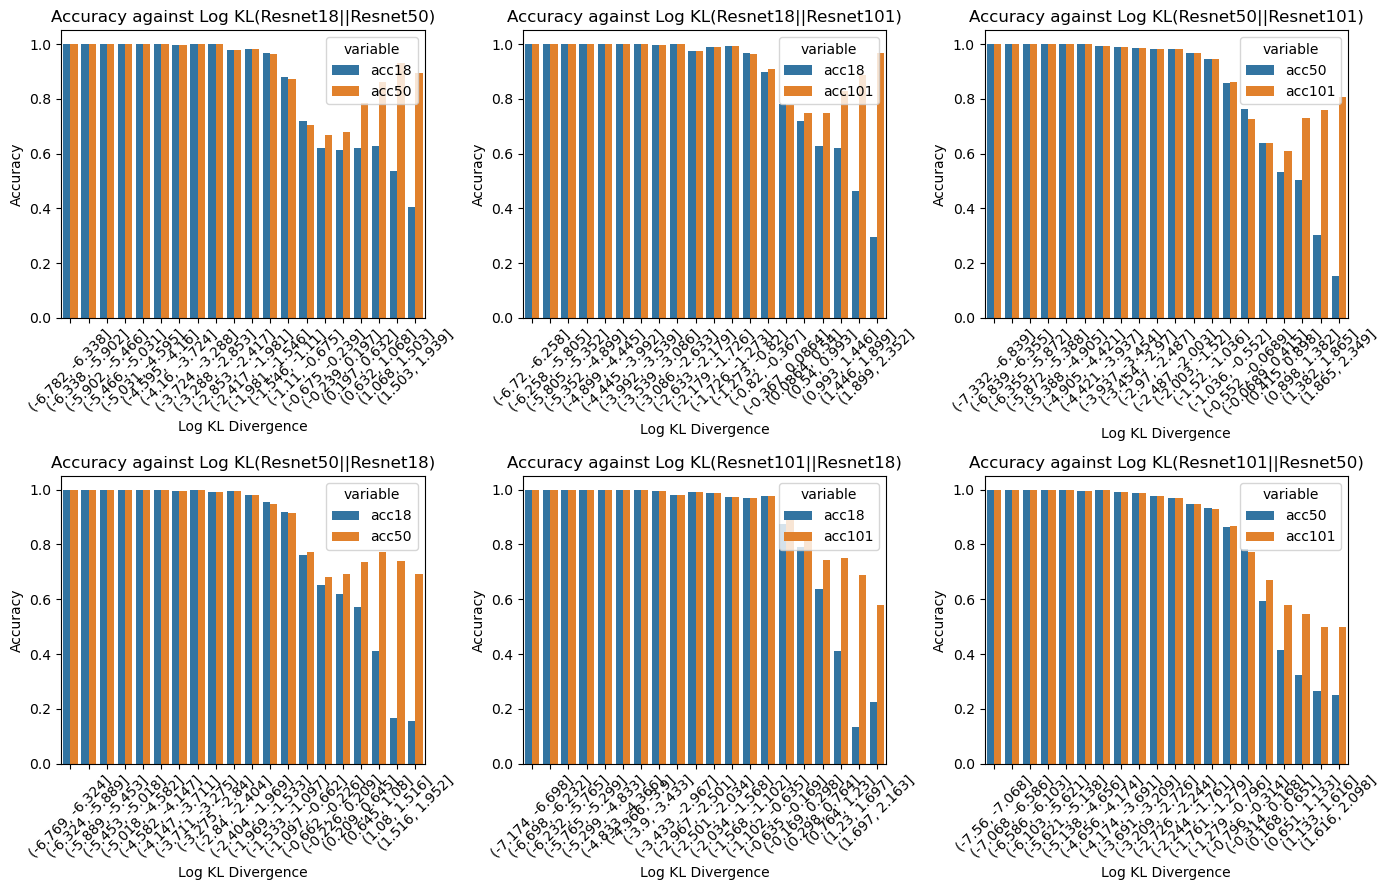

In [9]:
binnum=20
def bin_kl_vis(df, binnum, kl_name, acc_col1, acc_col2, ax, print_bin_size=False):
    df["bin_kl"] = pd.cut(df[kl_name].clip(-20, 10), bins=binnum)
    if print_bin_size:
        print(df["bin_kl"].value_counts().sort_index())
    grouped = df.groupby("bin_kl")[[acc_col1, acc_col2]].mean().reset_index()
    melted_grouped = grouped.melt(id_vars="bin_kl", var_name='variable', value_name='value')
    sns.barplot(x="bin_kl", y='value', hue='variable', data=melted_grouped, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel("Log KL Divergence")
    ax.set_ylabel("Accuracy")
    q, p = kl_name.split("_")[1], kl_name.split("_")[2]
    ax.set_title(f"Accuracy against Log KL(Resnet{q}||Resnet{p})")

fig, axs = plt.subplots(2, 3, figsize=(14, 9))
bin_kl_vis(df, binnum, "kl_18_50", "acc18", "acc50", axs[0, 0])
bin_kl_vis(df, binnum, "kl_18_101", "acc18", "acc101", axs[0, 1])
bin_kl_vis(df, binnum, "kl_50_18", "acc18", "acc50", axs[1, 0])
bin_kl_vis(df, binnum, "kl_50_101", "acc50", "acc101", axs[0, 2])
bin_kl_vis(df, binnum, "kl_101_18", "acc18", "acc101", axs[1, 1])
bin_kl_vis(df, binnum, "kl_101_50", "acc50", "acc101", axs[1, 2])
plt.tight_layout()
plt.show()

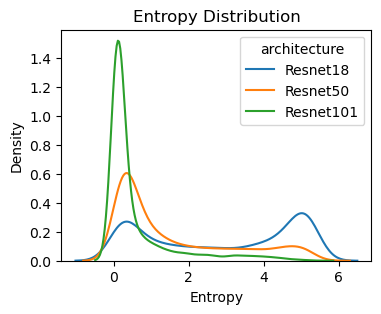

In [10]:
def calc_entropy(Q,numclass):
    return entropy(Q.iloc[:,0:numclass],axis=1)
df["entropy18"] = calc_entropy(df18,num_class)
df["entropy50"] = calc_entropy(df50,num_class)
df["entropy101"] = calc_entropy(df101,num_class)
df.head()

plt.figure(figsize=(4,3))
sns.kdeplot(df["entropy18"], label='Resnet18')
sns.kdeplot(df["entropy50"], label='Resnet50')
sns.kdeplot(df["entropy101"], label='Resnet101')
plt.title('Entropy Distribution')
plt.legend(title='architecture')
plt.xlabel('Entropy')
plt.ylabel('Density')
plt.show()

In [11]:
df.head()

,pred18,pred50,pred101,target,acc18,acc50,acc101,kl_18_50,kl_18_101,kl_50_18,kl_50_101,kl_101_18,kl_101_50,bin_kl,entropy18,entropy50,entropy101
0,24,24,24,24,1,1,1,-0.997149,1.444881,-0.782609,1.153053,1.315524,0.512795,"(0.168, 0.651]",5.372475,4.952115,0.360979
1,77,77,77,77,1,1,1,-1.216780,0.346291,-1.329084,0.203183,-0.495532,-0.469369,"(-0.796, -0.314]",3.329311,3.336954,0.519544
2,252,252,252,252,1,1,1,-4.709639,-5.205960,-4.067025,-4.627433,-4.766766,-5.050382,"(-5.138, -4.656]",0.077559,0.213891,0.125732
3,144,144,144,144,1,1,1,-2.290849,-2.740178,-3.118660,-5.166001,-3.415773,-4.720905,"(-5.138, -4.656]",0.580312,0.097354,0.176968
4,224,224,224,224,1,1,1,-0.191234,0.233197,-0.026356,1.299119,-0.686496,0.694630,"(0.651, 1.133]",3.061391,4.697774,0.243561


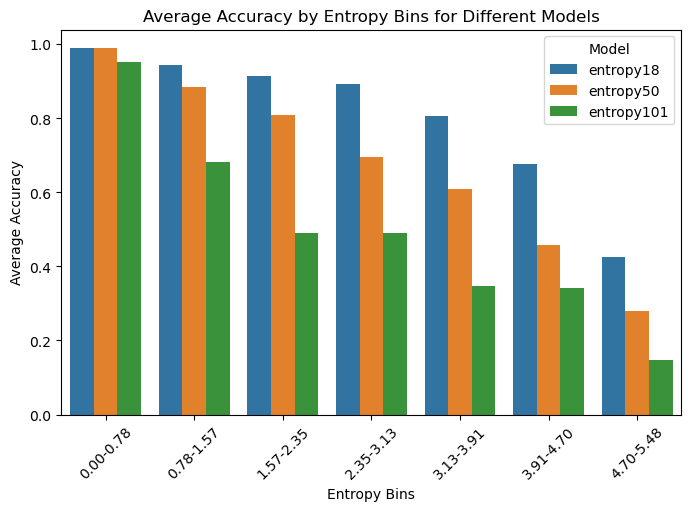

In [12]:
entropy_columns = ['entropy18', 'entropy50', 'entropy101']
overall_min = df[entropy_columns].min().min()
overall_max = df[entropy_columns].max().max()

num_bins = 7  # Define the number of bins
bins = np.linspace(overall_min, overall_max, num_bins + 1)
bin_labels = [f"{bins[i]:.2f}-{bins[i + 1]:.2f}" for i in range(num_bins)]

binned_data = pd.DataFrame()
for ent, acc in zip(entropy_columns, ['acc18', 'acc50', 'acc101']):
    df[f'{ent}_bin'] = pd.cut(df[ent], bins=bins, labels=bin_labels)
    mean_acc = df.groupby(f'{ent}_bin')[acc].mean().reset_index()
    mean_acc.columns = ['Bin', 'Average Accuracy']
    mean_acc['Entropy'] = ent
    binned_data = pd.concat([binned_data, mean_acc])

plt.figure(figsize=(8, 5))
sns.barplot(x='Bin', y='Average Accuracy', hue='Entropy', data=binned_data)
plt.title('Average Accuracy by Entropy Bins for Different Models')
plt.xlabel('Entropy Bins')
plt.ylabel('Average Accuracy')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Model')
plt.show()

In [13]:
entropy(df18.iloc[0,0:num_class],df50.iloc[0,0:num_class])

0.36892977558220563

,pred18,pred50,pred101,target,acc18,acc50,acc101,kl_18_50,kl_18_101,kl_50_18,...,entropy101,entropy18_bin,entropy50_bin,entropy101_bin,ce_18_50,ce_18_101,ce_50_18,ce_50_101,ce_101_18,ce_101_50
0,24,24,24,24,1,1,1,-0.997149,1.444881,-0.782609,...,0.360979,4.70-5.48,4.70-5.48,0.00-0.78,-0.997149,1.444881,-0.782609,1.153053,1.315524,0.512796
1,77,77,77,77,1,1,1,-1.216780,0.346291,-1.329084,...,0.519544,3.13-3.91,3.13-3.91,0.00-0.78,-1.216780,0.346291,-1.329084,0.203183,-0.495532,-0.469369


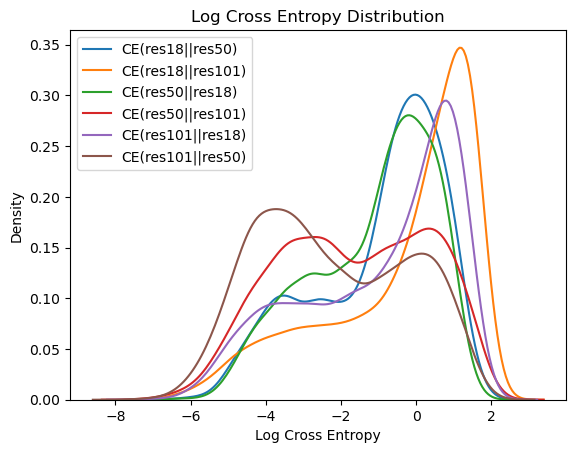

In [14]:
def calc_ce(Q,P,numclass):
    return np.log(entropy(Q.iloc[:,0:numclass],P.iloc[:,0:numclass],axis=1))
df["ce_18_50"] = calc_ce(df18,df50,num_class)
df["ce_18_101"] = calc_ce(df18,df101,num_class)
df["ce_50_18"] = calc_ce(df50,df18,num_class)
df["ce_50_101"] = calc_ce(df50,df101,num_class)
df["ce_101_18"] = calc_ce(df101,df18,num_class)
df["ce_101_50"] = calc_ce(df101,df50,num_class)
display(df.head(2))
sns.kdeplot(df["ce_18_50"], label='CE(res18||res50)')
sns.kdeplot(df["ce_18_101"], label='CE(res18||res101)')
sns.kdeplot(df["ce_50_18"], label='CE(res50||res18)')
sns.kdeplot(df["ce_50_101"], label='CE(res50||res101)')
sns.kdeplot(df["ce_101_18"], label='CE(res101||res18)')
sns.kdeplot(df["ce_101_50"], label='CE(res101||res50)')
plt.title('Log Cross Entropy Distribution')
plt.xlabel('Log Cross Entropy')
plt.ylabel('Density')
plt.legend()

In [15]:
"ce_18_50"[2:]

'_18_50'

/var/folders/ql/j7zs0n1150x82l4g24_b0jzm0000gn/T/ipykernel_40727/2541452210.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/ql/j7zs0n1150x82l4g24_b0jzm0000gn/T/ipykernel_40727/2541452210.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/ql/j7zs0n1150x82l4g24_b0jzm0000gn/T/ipykernel_40727/2541452210.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/ql/j7zs0n1150x82l4g24_b0jzm0000gn/T/ipykernel_40727/2541452210.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/ql/j7zs0n1150x82l4g24_b0jzm0000gn/T/ipykernel_40727/2541452210.py:10: UserWarning: FixedFormatter should only be used together with

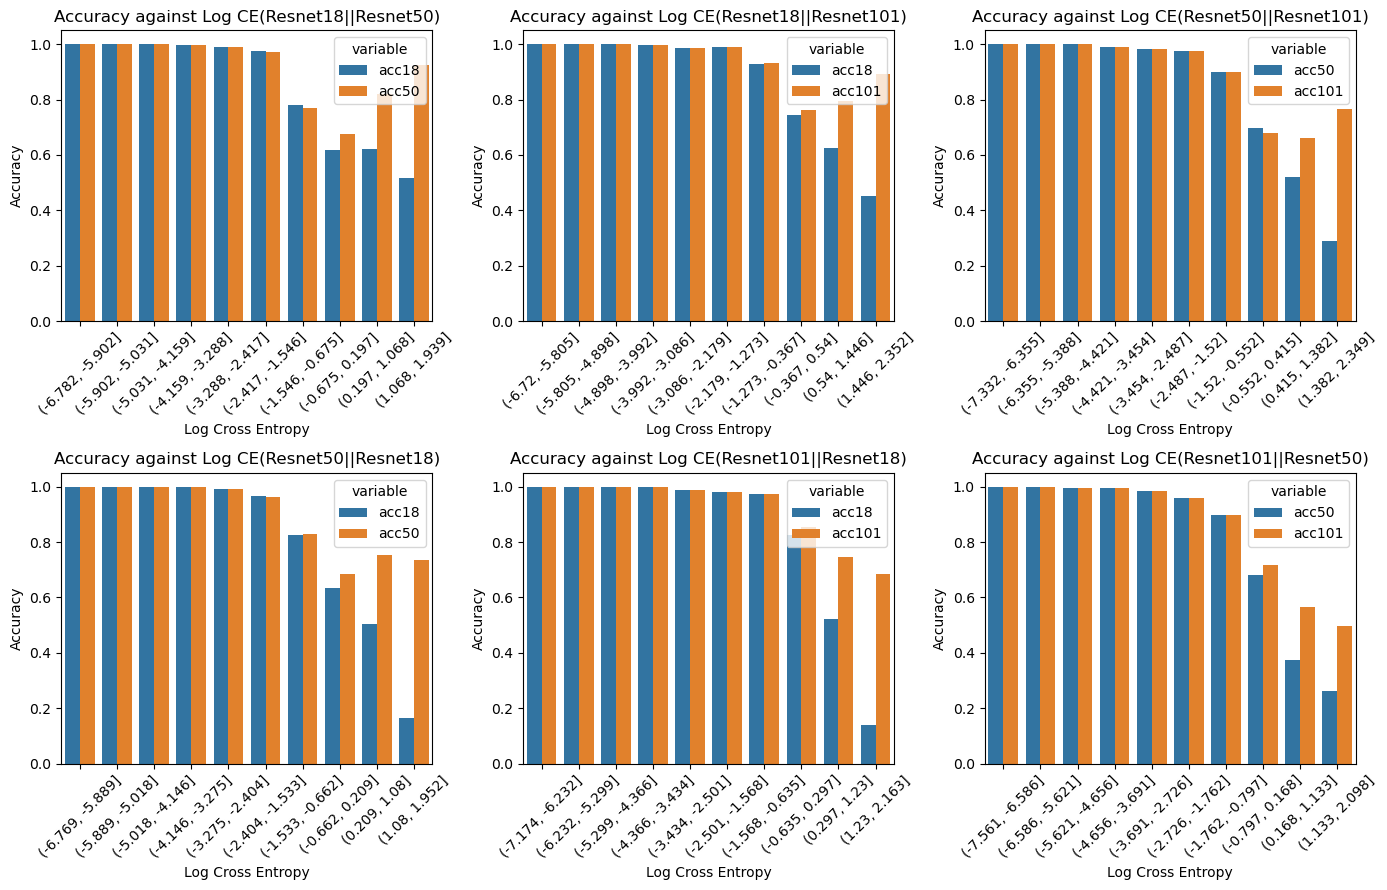

In [16]:
binnum=10
def bin_ce_vis(df, binnum, ce_name, acc_col1, acc_col2, ax, print_bin_size=False):
    bin_ce_col_name = "bin_ce"+ce_name[2:]
    df[bin_ce_col_name] = pd.cut(df[ce_name].clip(-20, 10), bins=binnum)
    if print_bin_size:
        print(df[bin_ce_col_name].value_counts().sort_index())
    grouped = df.groupby(bin_ce_col_name)[[acc_col1, acc_col2]].mean().reset_index()
    melted_grouped = grouped.melt(id_vars=bin_ce_col_name, var_name='variable', value_name='value')
    sns.barplot(x=bin_ce_col_name, y='value', hue='variable', data=melted_grouped, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel("Log Cross Entropy")
    ax.set_ylabel("Accuracy")
    q, p = ce_name.split("_")[1], ce_name.split("_")[2]
    ax.set_title(f"Accuracy against Log CE(Resnet{q}||Resnet{p})")

fig, axs = plt.subplots(2, 3, figsize=(14, 9))
bin_ce_vis(df, binnum, "ce_18_50", "acc18", "acc50", axs[0, 0])
bin_ce_vis(df, binnum, "ce_18_101", "acc18", "acc101", axs[0, 1])
bin_ce_vis(df, binnum, "ce_50_18", "acc18", "acc50", axs[1, 0])
bin_ce_vis(df, binnum, "ce_50_101", "acc50", "acc101", axs[0, 2])
bin_ce_vis(df, binnum, "ce_101_18", "acc18", "acc101", axs[1, 1])
bin_ce_vis(df, binnum, "ce_101_50", "acc50", "acc101", axs[1, 2])
plt.tight_layout()
plt.show()

In [17]:
def calc_ir(pred1,pred2,pred3,numclass=num_class):
    k=3
    P1 = pred1.iloc[:,0:numclass]
    P2 = pred2.iloc[:,0:numclass]
    P3 = pred3.iloc[:,0:numclass]
    M = (P1+P2+P3)/k
    D1 = rel_entr(P1,M).sum(1)
    D2 = rel_entr(P2,M).sum(1)
    D3 = rel_entr(P3,M).sum(1)    
    return np.log((D1+D2+D3)/k)
df["info_rad"] = calc_ir(df18,df50,df101,num_class)

Text(0.5, 1.0, 'Information Radius Distribution')

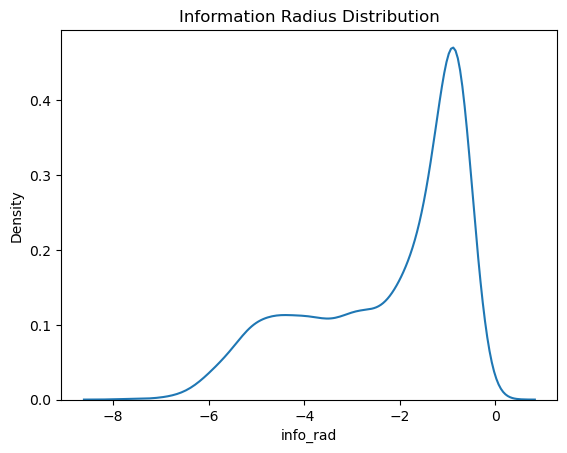

In [18]:
sns.kdeplot(df["info_rad"])
plt.title("Information Radius Distribution")

Text(0.5, 1.0, 'Information Radius Against KL')

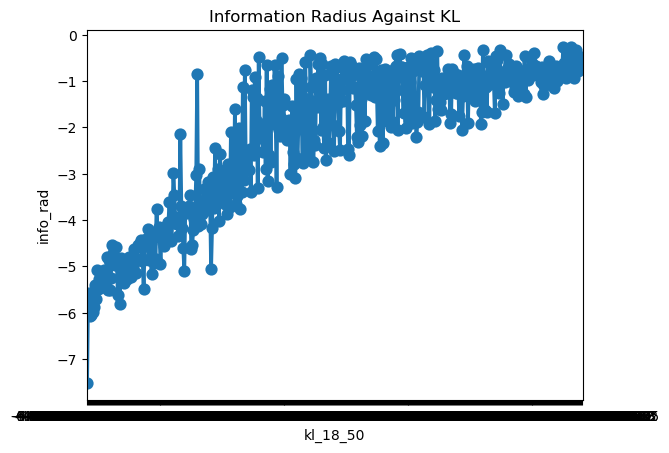

In [19]:
sns.pointplot(x="kl_18_50",y="info_rad",data=df.sample(n=500, random_state=1))
plt.title("Information Radius Against KL")

info_rad_bin
(-7.762, -7.375]        3
(-7.375, -6.988]        2
(-6.988, -6.601]       10
(-6.601, -6.214]       29
(-6.214, -5.827]       80
(-5.827, -5.44]       135
(-5.44, -5.053]       224
(-5.053, -4.666]      250
(-4.666, -4.279]      280
(-4.279, -3.892]      256
(-3.892, -3.505]      268
(-3.505, -3.118]      258
(-3.118, -2.731]      280
(-2.731, -2.344]      268
(-2.344, -1.957]      333
(-1.957, -1.57]       440
(-1.57, -1.183]       665
(-1.183, -0.796]     1222
(-0.796, -0.409]     1039
(-0.409, -0.0223]      79
Name: count, dtype: int64


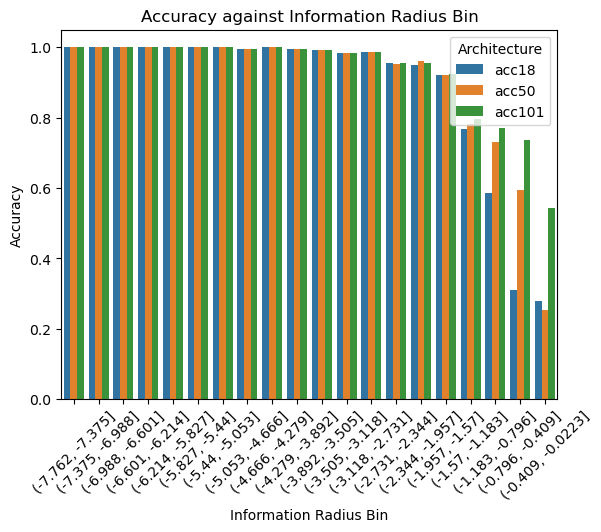

In [20]:
overall_min = df["info_rad"].min()
overall_max = df["info_rad"].max()
num_bins = 20  # Define the number of bins
bins = np.linspace(overall_min, overall_max, num_bins + 1)
binned_data = pd.DataFrame()
df['info_rad_bin'] = pd.cut(df["info_rad"], bins=bins)
mean_acc = df.groupby('info_rad_bin')[["acc18","acc50","acc101"]].mean().reset_index()
counts = df['info_rad_bin'].value_counts().sort_index()
print(counts)
melted_df = mean_acc.melt(id_vars=['info_rad_bin'], value_vars=['acc18', 'acc50', 'acc101'], var_name='Accuracy', value_name='Value')
sns.barplot(x='info_rad_bin', y='Value', hue='Accuracy', data=melted_df)
plt.xticks(rotation=45)  # Rotate x labels for better readability if needed
plt.xlabel('Information Radius Bin')
plt.ylabel('Accuracy')
plt.title('Accuracy against Information Radius Bin')
plt.legend(title='Architecture')
plt.show()

In [21]:
df.columns

Index(['pred18', 'pred50', 'pred101', 'target', 'acc18', 'acc50', 'acc101',
       'kl_18_50', 'kl_18_101', 'kl_50_18', 'kl_50_101', 'kl_101_18',
       'kl_101_50', 'bin_kl', 'entropy18', 'entropy50', 'entropy101',
       'entropy18_bin', 'entropy50_bin', 'entropy101_bin', 'ce_18_50',
       'ce_18_101', 'ce_50_18', 'ce_50_101', 'ce_101_18', 'ce_101_50',
       'bin_ce_18_50', 'bin_ce_18_101', 'bin_ce_50_18', 'bin_ce_50_101',
       'bin_ce_101_18', 'bin_ce_101_50', 'info_rad', 'info_rad_bin'],
      dtype='object')

entropy18_bin
(0.000355, 0.548]    1322
(0.548, 1.096]        553
(1.096, 1.644]        381
(1.644, 2.192]        335
(2.192, 2.74]         305
(2.74, 3.287]         280
(3.287, 3.835]        332
(3.835, 4.383]        443
(4.383, 4.931]        790
(4.931, 5.479]       1381
Name: count, dtype: int64


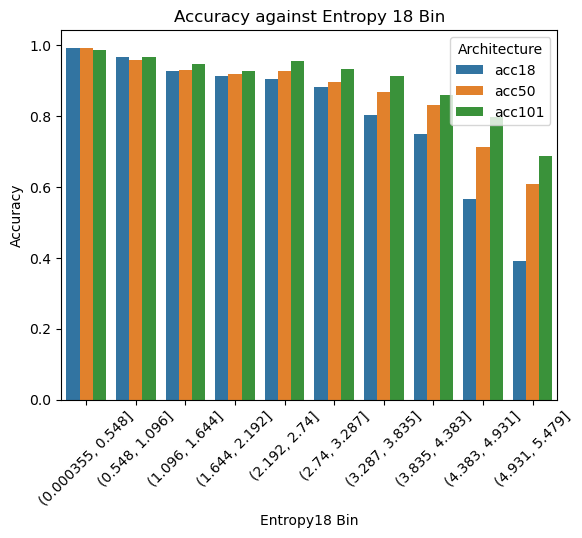

In [22]:
ent_cols = ["entropy18","entropy50","entropy101"]
overall_min = df[ent_cols].min().min()
overall_max = df[ent_cols].max().max()
num_bins = 10  # Define the number of bins
bins = np.linspace(overall_min, overall_max, num_bins + 1)
binned_data = pd.DataFrame()
df['entropy18_bin'] = pd.cut(df["entropy18"], bins=bins)
mean_acc = df.groupby('entropy18_bin')[["acc18","acc50","acc101"]].mean().reset_index()
counts = df['entropy18_bin'].value_counts().sort_index()
print(counts)
melted_df = mean_acc.melt(id_vars=['entropy18_bin'], value_vars=['acc18', 'acc50', 'acc101'], var_name='Accuracy', value_name='Value')
sns.barplot(x='entropy18_bin', y='Value', hue='Accuracy', data=melted_df)
plt.xticks(rotation=45)
plt.xlabel('Entropy18 Bin')
plt.ylabel('Accuracy')
plt.title('Accuracy against Entropy 18 Bin')
plt.legend(title='Architecture')
plt.show()

/var/folders/ql/j7zs0n1150x82l4g24_b0jzm0000gn/T/ipykernel_40727/701329537.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/ql/j7zs0n1150x82l4g24_b0jzm0000gn/T/ipykernel_40727/701329537.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/ql/j7zs0n1150x82l4g24_b0jzm0000gn/T/ipykernel_40727/701329537.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


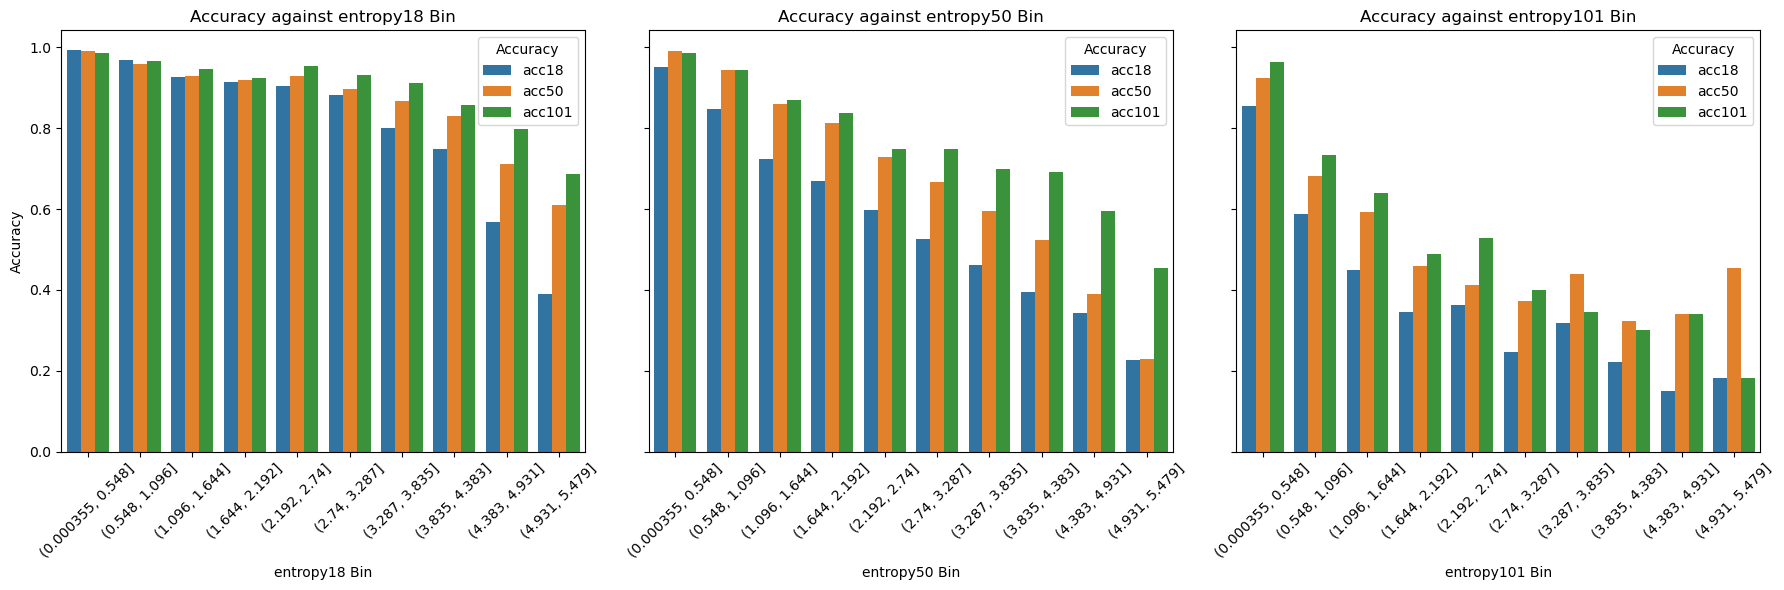

In [23]:
ent_cols = ["entropy18","entropy50","entropy101"]
overall_min = df[ent_cols].min().min()
overall_max = df[ent_cols].max().max()
num_bins = 10  # Define the number of bins

for col in ent_cols:
    df[f'{col}_bin'] = pd.cut(df[col], bins=bins)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop through each entropy bin, calculate mean accuracies, and plot
for i, col in enumerate(ent_cols):
    # Group by the binned column and calculate mean
    mean_acc = df.groupby(f'{col}_bin')[["acc18", "acc50", "acc101"]].mean().reset_index()
    # Melt the DataFrame for easy plotting
    melted_df = mean_acc.melt(id_vars=[f'{col}_bin'], value_vars=['acc18', 'acc50', 'acc101'],
                              var_name='Accuracy', value_name='Value')
    # Create barplot on subplot
    sns.barplot(x=f'{col}_bin', y='Value', hue='Accuracy', data=melted_df, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_xlabel(f'{col} Bin')
    axes[i].set_title(f'Accuracy against {col} Bin')
    if i == 0:
        axes[i].set_ylabel('Accuracy')
    else:
        axes[i].set_ylabel('')

# Adjust layout and add a legend
plt.tight_layout()
handles, labels = axes[-1].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', ncol=3, title='Architecture')
plt.show()

There's a similar trend but it seems like it's either noisy or contains more information.

<Axes: xlabel='entropy18_bin', ylabel='bin_ce_18_50'>

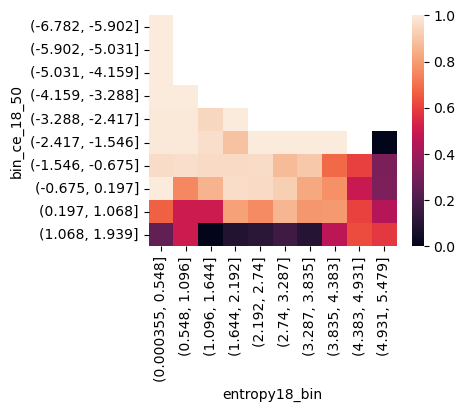

In [24]:
plt.figure(figsize=(4,3))
grouped = df.groupby(["entropy18_bin","bin_ce_18_50"])[["acc18"]].mean().reset_index()
sns.heatmap(grouped.pivot(index="bin_ce_18_50", columns="entropy18_bin", values="acc18"),)

<Axes: xlabel='entropy18_bin', ylabel='bin_ce_18_101'>

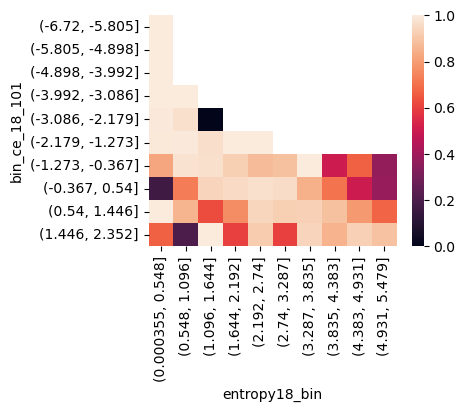

In [25]:
plt.figure(figsize=(4,3))
grouped = df.groupby(["entropy18_bin","bin_ce_18_101"])[["acc101"]].mean().reset_index()
sns.heatmap(grouped.pivot(index="bin_ce_18_101", columns="entropy18_bin", values="acc101"),)

<Axes: xlabel='entropy101_bin', ylabel='bin_ce_18_101'>

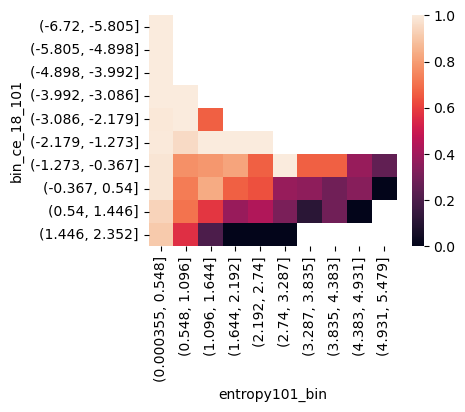

In [26]:
plt.figure(figsize=(4,3))
grouped = df.groupby(["entropy101_bin","bin_ce_18_101"])[["acc101"]].mean().reset_index()
sns.heatmap(grouped.pivot(index="bin_ce_18_101", columns="entropy101_bin", values="acc101"),)

<Axes: xlabel='entropy101_bin', ylabel='bin_ce_18_101'>

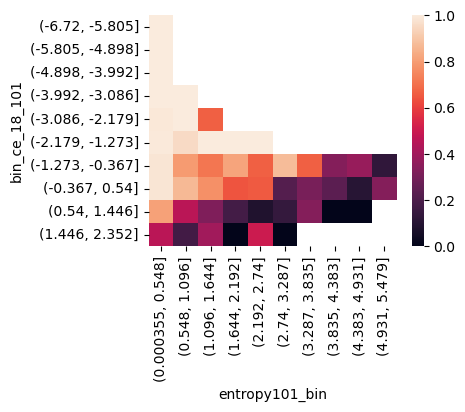

In [27]:
plt.figure(figsize=(4,3))
grouped = df.groupby(["entropy101_bin","bin_ce_18_101"])[["acc18"]].mean().reset_index()
sns.heatmap(grouped.pivot(index="bin_ce_18_101", columns="entropy101_bin", values="acc18"),)

<Axes: xlabel='entropy101_bin', ylabel='bin_ce_18_101'>

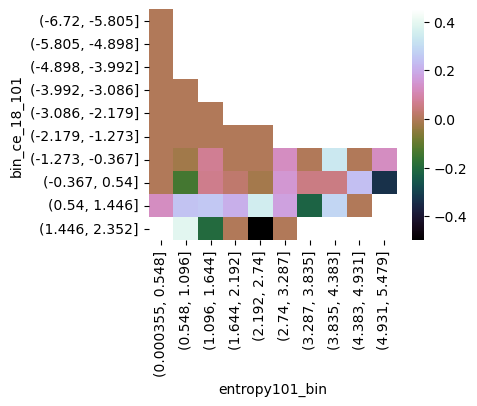

In [28]:
plt.figure(figsize=(4,3))
grouped = df.groupby(["entropy101_bin","bin_ce_18_101"])[["acc18","acc101"]].mean().reset_index()
grouped["diff_101_18"] = grouped["acc101"]-grouped["acc18"]
sns.heatmap(grouped.pivot(index="bin_ce_18_101", columns="entropy101_bin", values="diff_101_18"),cmap="cubehelix")

<Axes: xlabel='entropy18_bin', ylabel='bin_ce_18_101'>

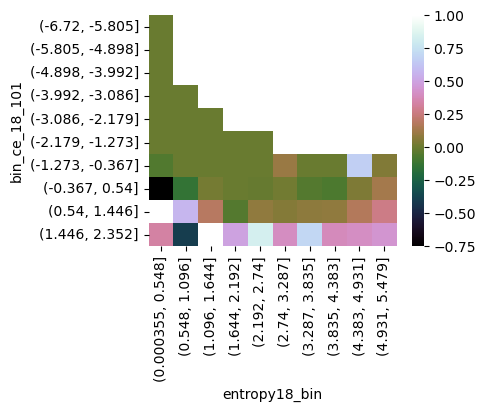

In [29]:
plt.figure(figsize=(4,3))
grouped = df.groupby(["entropy18_bin","bin_ce_18_101"])[["acc18","acc101"]].mean().reset_index()
grouped["diff_101_18"] = grouped["acc101"]-grouped["acc18"]
sns.heatmap(grouped.pivot(index="bin_ce_18_101", columns="entropy18_bin", values="diff_101_18"),cmap="cubehelix")

<Axes: xlabel='entropy18_bin', ylabel='bin_ce_101_18'>

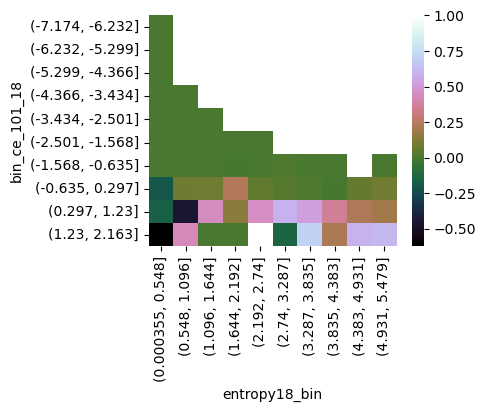

In [30]:
plt.figure(figsize=(4,3))
grouped = df.groupby(["entropy18_bin","bin_ce_101_18"])[["acc18","acc101"]].mean().reset_index()
grouped["diff_101_18"] = grouped["acc101"]-grouped["acc18"]
sns.heatmap(grouped.pivot(index="bin_ce_101_18", columns="entropy18_bin", values="diff_101_18"),cmap="cubehelix")

<Axes: xlabel='entropy101_bin', ylabel='bin_ce_101_18'>

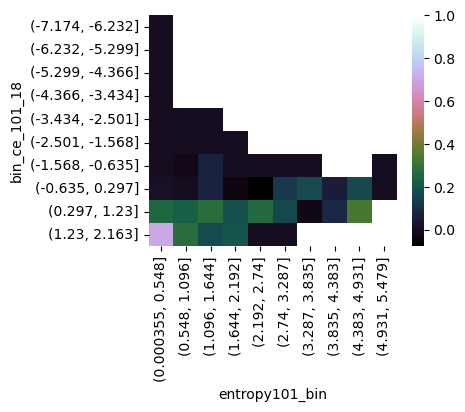

In [31]:
plt.figure(figsize=(4,3))
grouped = df.groupby(["entropy101_bin","bin_ce_101_18"])[["acc18","acc101"]].mean().reset_index()
grouped["diff_101_18"] = grouped["acc101"]-grouped["acc18"]
sns.heatmap(grouped.pivot(index="bin_ce_101_18", columns="entropy101_bin", values="diff_101_18"),cmap="cubehelix")

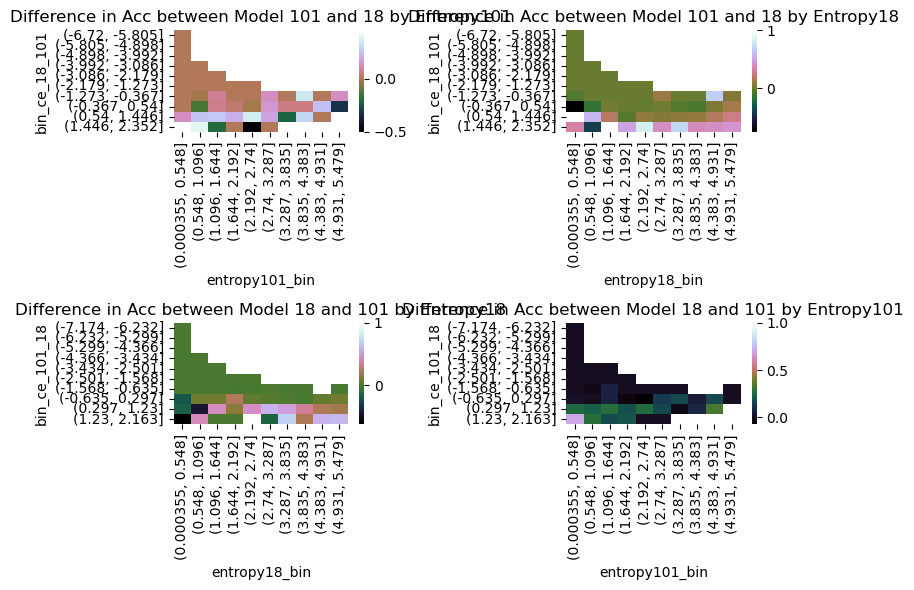

In [32]:
# plt.figure(figsize=(4,3))
# grouped = df.groupby(["entropy101_bin","bin_ce_18_101"])[["acc18","acc101"]].mean().reset_index()
# grouped["diff_101_18"] = grouped["acc101"]-grouped["acc18"]
# sns.heatmap(grouped.pivot(index="bin_ce_18_101", columns="entropy101_bin", values="diff_101_18"),cmap="cubehelix")

# plt.figure(figsize=(4,3))
# grouped = df.groupby(["entropy18_bin","bin_ce_18_101"])[["acc18","acc101"]].mean().reset_index()
# grouped["diff_101_18"] = grouped["acc101"]-grouped["acc18"]
# sns.heatmap(grouped.pivot(index="bin_ce_18_101", columns="entropy18_bin", values="diff_101_18"),cmap="cubehelix")

# plt.figure(figsize=(4,3))
# grouped = df.groupby(["entropy18_bin","bin_ce_101_18"])[["acc18","acc101"]].mean().reset_index()
# grouped["diff_101_18"] = grouped["acc101"]-grouped["acc18"]
# sns.heatmap(grouped.pivot(index="bin_ce_101_18", columns="entropy18_bin", values="diff_101_18"),cmap="cubehelix")

# plt.figure(figsize=(4,3))
# grouped = df.groupby(["entropy101_bin","bin_ce_101_18"])[["acc18","acc101"]].mean().reset_index()
# grouped["diff_101_18"] = grouped["acc101"]-grouped["acc18"]
# sns.heatmap(grouped.pivot(index="bin_ce_101_18", columns="entropy101_bin", values="diff_101_18"),cmap="cubehelix")

plt.figure(figsize=(8, 6))  # Adjust the overall figure size if needed

# Plot 1
plt.subplot(2, 2, 1)
grouped = df.groupby(["entropy101_bin", "bin_ce_18_101"])[["acc18", "acc101"]].mean().reset_index()
grouped["diff_101_18"] = grouped["acc101"] - grouped["acc18"]
sns.heatmap(grouped.pivot(index="bin_ce_18_101", columns="entropy101_bin", values="diff_101_18"), cmap="cubehelix")
plt.title("Difference in Acc between Model 101 and 18 by Entropy101")

# Plot 2
plt.subplot(2, 2, 2)
grouped = df.groupby(["entropy18_bin", "bin_ce_18_101"])[["acc18", "acc101"]].mean().reset_index()
grouped["diff_101_18"] = grouped["acc101"] - grouped["acc18"]
sns.heatmap(grouped.pivot(index="bin_ce_18_101", columns="entropy18_bin", values="diff_101_18"), cmap="cubehelix")
plt.title("Difference in Acc between Model 101 and 18 by Entropy18")

# Plot 3
plt.subplot(2, 2, 3)
grouped = df.groupby(["entropy18_bin", "bin_ce_101_18"])[["acc18", "acc101"]].mean().reset_index()
grouped["diff_101_18"] = grouped["acc101"] - grouped["acc18"]
sns.heatmap(grouped.pivot(index="bin_ce_101_18", columns="entropy18_bin", values="diff_101_18"), cmap="cubehelix")
plt.title("Difference in Acc between Model 18 and 101 by Entropy18")

# Plot 4
plt.subplot(2, 2, 4)
grouped = df.groupby(["entropy101_bin", "bin_ce_101_18"])[["acc18", "acc101"]].mean().reset_index()
grouped["diff_101_18"] = grouped["acc101"] - grouped["acc18"]
sns.heatmap(grouped.pivot(index="bin_ce_101_18", columns="entropy101_bin", values="diff_101_18"), cmap="cubehelix")
plt.title("Difference in Acc between Model 18 and 101 by Entropy101")

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()